In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.stats import norm

In [2]:
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

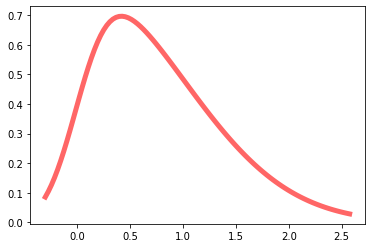

In [3]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')

(array([ 1.,  5., 10., 31., 30., 17.,  6.]),
 array([-2.52057907, -1.80701912, -1.09345918, -0.37989924,  0.3336607 ,
         1.04722065,  1.76078059,  2.47434053]),
 <a list of 7 Patch objects>)

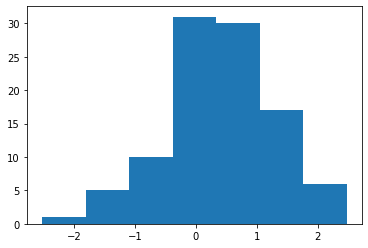

In [4]:
shape = 0.5
x = skewnorm.rvs(shape, loc=0, scale=1, size=100)
plt.hist(x, bins=7)

In [89]:
def gen_skewnormal(mean, var, alpha, size, random_state=None):
    # generate standard skew normal distribution
    X = skewnorm.rvs(alpha, loc=0, scale=1, size=size, random_state=random_state)
    print('(0)')
    print(mean, X.mean())
    print(var, X.var())
    
    # theory expectation value (mean) and variance of standard skew normal distribution
    tmean = np.sqrt(2/np.pi) * alpha / np.sqrt(1+alpha**2)
    tvar = 1 - 2/np.pi * alpha / np.sqrt(1+alpha**2)
    print(tvar)

    # (1)adjust var (2)adjust mean. Order can not reverse
    X = np.sqrt(var/tvar) * X
    print('(1)')
    print(mean, X.mean())
    print(var, X.var())
    
    tmean = np.sqrt(var/tvar) * np.sqrt(2/np.pi) * alpha / np.sqrt(1+alpha**2)
    X = X + mean - tmean    
    print('(2)')
    print(mean, X.mean())
    print(var, X.var())

In [102]:
gen_skewnormal(5, 2, 0.6, 100000, 42)

(0)
5 0.41606607688504976
2 0.8313804969030753
0.6724618292956412
(1)
5 0.7175356557743329
2 2.472647399998572
(2)
5 5.009584921268192
2 2.472647399998572


In [75]:
# 現在的調整還是怪怪的，最後得到的樣本變異數會受到不同的alpha影響，越大的alpha越接近給定的var

In [32]:
h = []
for i in range(100):
    h.append(norm.rvs(size=100).mean())

In [34]:
sum(h) / 100

0.004613941776883376